# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import matplotlib.colors
import folium
import statistics


hashid='fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
df = pd.read_csv('BinSize_d.csv')

station_locations_by_hash = df[df['hash'] == hashid]
    
station_id=df[df['hash'] == hashid]

lats=station_locations_by_hash["LATITUDE"]
lons=station_locations_by_hash["LONGITUDE"]

lons_mean=statistics.mean(lons)
lats_mean=statistics.mean(lats)

m=folium.Map(location=[lats_mean,lons_mean])

for index, row in station_locations_by_hash.iterrows():
    folium.CircleMarker(location=[row.LATITUDE,row.LONGITUDE], radius=5).add_to(m)
m





<IPython.core.display.Javascript object>


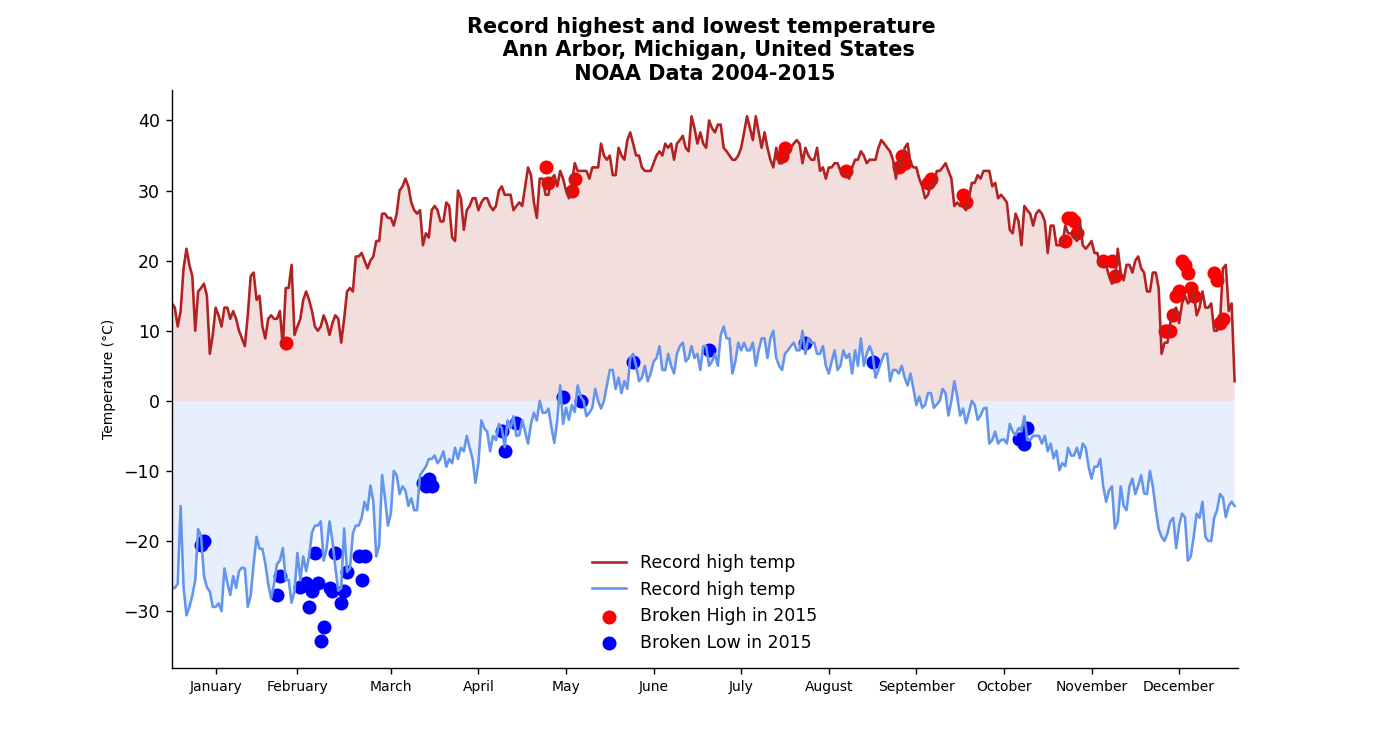

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import matplotlib.colors


main_df= pd.read_csv('alldata.csv', skipinitialspace = True)

main_df['Date']=main_df['Date'].str.strip()

#converting temp values from tenths of C to degrees
main_df['Data_Value']=main_df['Data_Value']/10
#removing leap year feb 29 days
main_df =main_df[ ~main_df['Date'].str.contains('02-29')]

#creating dataframe for year from 2005 to 2015 and one for only 2015
data2005_2014_df= main_df[ ~main_df['Date'].str.contains('2015')]
data2015_df= main_df[main_df['Date'].str.contains('2015')]

data2005_2014_df=data2005_2014_df.copy()
data2005_2014_df['Date']=data2005_2014_df['Date'].astype('datetime64[D]')
data2005_2014_df['DayofYear']=data2005_2014_df['Date'].dt.dayofyear
data2005_2014_df=data2005_2014_df.sort_values(by=['Date'])

data2015_df=data2015_df.copy()   
data2015_df['Date']=data2015_df['Date'].astype('datetime64[D]')
data2015_df['DayofYear']=data2015_df['Date'].dt.dayofyear
data2015_df=data2015_df.sort_values(by=['Date'])


data2015_high = data2015_df.groupby('DayofYear')['Data_Value'].max()
data2015_low = data2015_df.groupby('DayofYear')['Data_Value'].min()

record_high = data2005_2014_df.groupby('DayofYear')['Data_Value'].max()
record_high = record_high.iloc[1:]
record_high.index = range(1,len(record_high)+1)
record_high.name='DayofYear'
high_MA = record_high.rolling(5).mean()
record_low = data2005_2014_df.groupby('DayofYear')['Data_Value'].min()
record_low = record_low.iloc[1:]
record_low.index = range(1,len(record_low)+1)
record_low.name='DayofYear'
low_MA = record_low.rolling(5).mean()

all_high=record_high.max()
all_low=record_low.min()

record_high_2015 =data2015_high[data2015_high >record_high]

record_low_2015 =data2015_low[data2015_low <record_low]

x=record_high_2015.keys()
y=record_low_2015.keys()

months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(11,6))
figure_gca=plt.gca()

plt.xlim([0, 365])
tickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
plt.xticks(ticks = tickvalues ,labels = months, rotation = 'horizontal',fontsize=8)

plt.plot(range(0,365), record_high, color='firebrick',label = "Record high temp" )
plt.plot(range(0,365), record_low, color='cornflowerblue', label = "Record high temp")
figure_gca.fill_between(range(0,365),record_high, 0,where = record_high >=0 ,facecolor='firebrick', alpha=0.15)
figure_gca.fill_between(range(0,365),0, record_low,where = record_low  >=0 ,facecolor='white')
figure_gca.fill_between(range(0,365),0, record_low,where = record_low <=0 ,facecolor='cornflowerblue', alpha=0.15)

plt.scatter(x,record_high_2015,marker='o',s=50,c='red', label = "Broken High in 2015")
plt.scatter(y,record_low_2015,s=50,c='blue',label = "Broken Low in 2015")

plt.gca().set_title('Record highest and lowest temperature \n  Ann Arbor, Michigan, United States \n NOAA Data 2004-2015 ', fontsize=12, fontweight ='bold')
#plt.gca().set_xlabel('Day of the year')
plt.gca().set_ylabel('Temperature (°C)',fontsize=8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=10, frameon = False)


